# [Project 6: Classifying Point Clouds with PointNet](https://github.gatech.edu/cs4476/project-6)

For this project, we are going to build deep learning architectures to classify point clouds that were extracted from self-driving car LiDAR scans.

Basic learning objectives of this project:
* Construct the basic pipeline used for point cloud classification
* Analyze the results from our model and look for potential points of improvement
* Understand the limitations of the model and improve it using positional encodings

## Setup

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import torch
from vision.utils import verify

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Lets take a second to visualize a few point clouds that we are going to train our model on. You might need to rotate the visualization before you can actually see the object being represented by the points. See if you can make out this pedestrian's arms, legs, and head.

In [3]:
from vision.utils import plot_cloud_from_file

plot_cloud_from_file('data/sweeps/PEDESTRIAN/11.txt')

## Part 1: Data Loading

The first order of business we're going to take care of is writing a PyTorch dataset that will load in the data we'll be using to train and test our model. We have a total of 20 different classes that all found under the `data/sweeps` folder and each class has been split into a training and testing set. We will write a class that will load the appropriate data given the split we pass in (i.e. train/test split).

**TODO 1:** complete `part1_dataloader.py`

In [4]:
from vision.part1_dataloader import Argoverse
from torch.utils.data import DataLoader
from tests.test_part1 import (
    test_dataset_length, 
    test_unique_values, 
    test_get_points_from_file, 
    test_pad_points, 
    test_class_values
)

In [5]:
print("test_dataset_length(): ", verify(test_dataset_length))
print("test_unique_values(): ", verify(test_unique_values))
print("test_get_points_from_file(): ", verify(test_get_points_from_file))
print("test_pad_points(): ", verify(test_pad_points))
print("test_class_values(): ", verify(test_class_values))

test_dataset_length():  "Correct"
test_unique_values():  "Correct"
test_get_points_from_file():  "Correct"
test_pad_points():  "Correct"
test_class_values():  "Correct"


Now we can load in our data. When extracting object point clouds from LiDAR scans, we pruned point clouds with large numbers of points to reduce the computational demand of training and testing our classifiers. We pruned all point clouds to have a maximum of 200 points so that is the size that we will be padding all of the other point clouds to. (Feel free to adjust the batch size if you find a value that works better with your implementation)

In [6]:
train_dataset = Argoverse('train', 'data/sweeps', 200)
test_dataset = Argoverse('test', 'data/sweeps', 200)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)

## Part 2: Baseline

A very simple baseline to start with is a voxel-based approach. Our overall point cloud falls in a 4x4x4 meter volume in space. We can divide this up into 1x1x1 meter volumes which would give us a total of 64 $1m^3$ cells. We build a 64-dimensional feature for a point by simply counting how many points in the point cloud fall into each cell then normalizng the resulting feature vector.

For more details see the project pdf.

**TODO 2:** complete `part2_baseline.py`

In [7]:
from vision.part2_baseline import Baseline
from torch import optim
from vision.training import train, test
from tests.test_part2 import (
    test_count_points,
    test_baseline
)

In [8]:
print("test_count_points(): ", verify(test_count_points))
print("test_baseline(): ", verify(test_baseline))

test_count_points():  "Correct"
test_baseline():  "Correct"


Lets train our baseline implementation and see how it does! Fill in the hyperparameters and train your model. 

To get full credit for this section, you will need *$\geq$ 30%* accuracy on the test data set. The TAs were able to consistently achieve this accuracy with ~15 epochs.

*Hint: Play around with different voxel resolutions and the two different modes you implemented to see which configuration works the best.*

In [9]:
lr = 1e-3
weight_decay = 1e-6
epochs = 20

model = Baseline(20)
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

In [10]:
train_acc, train_loss, test_acc, test_loss = train(model, optimizer, epochs, train_loader, test_loader)

Epoch 1

Training...


100%|██████████| 213/213 [00:04<00:00, 45.76it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 49.79it/s]



Epoch 1 Stats:
	Training accuracy: 0.0768
	Training loss: 2.9796
	Validation accuracy: 0.0533
	Validation loss: 2.9672

Validation accuracy improved from 0 to 0.0533333346247673
Saving model to Baseline.pt


Epoch 2

Training...


100%|██████████| 213/213 [00:04<00:00, 52.29it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 56.72it/s]



Epoch 2 Stats:
	Training accuracy: 0.1362
	Training loss: 2.9299
	Validation accuracy: 0.1417
	Validation loss: 2.9352

Validation accuracy improved from 0.0533333346247673 to 0.14166666567325592
Saving model to Baseline.pt


Epoch 3

Training...


100%|██████████| 213/213 [00:03<00:00, 54.46it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 53.01it/s]



Epoch 3 Stats:
	Training accuracy: 0.2326
	Training loss: 2.8846
	Validation accuracy: 0.1783
	Validation loss: 2.9065

Validation accuracy improved from 0.14166666567325592 to 0.1783333271741867
Saving model to Baseline.pt


Epoch 4

Training...


100%|██████████| 213/213 [00:03<00:00, 53.73it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 56.20it/s]



Epoch 4 Stats:
	Training accuracy: 0.2812
	Training loss: 2.8420
	Validation accuracy: 0.1917
	Validation loss: 2.8793

Validation accuracy improved from 0.1783333271741867 to 0.19166666269302368
Saving model to Baseline.pt


Epoch 5

Training...


100%|██████████| 213/213 [00:04<00:00, 51.42it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 50.15it/s]



Epoch 5 Stats:
	Training accuracy: 0.3082
	Training loss: 2.8014
	Validation accuracy: 0.1950
	Validation loss: 2.8528

Validation accuracy improved from 0.19166666269302368 to 0.19499999284744263
Saving model to Baseline.pt


Epoch 6

Training...


100%|██████████| 213/213 [00:03<00:00, 55.73it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 57.95it/s]



Epoch 6 Stats:
	Training accuracy: 0.3226
	Training loss: 2.7626
	Validation accuracy: 0.2083
	Validation loss: 2.8319

Validation accuracy improved from 0.19499999284744263 to 0.2083333283662796
Saving model to Baseline.pt


Epoch 7

Training...


100%|██████████| 213/213 [00:03<00:00, 55.16it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 56.83it/s]



Epoch 7 Stats:
	Training accuracy: 0.3318
	Training loss: 2.7263
	Validation accuracy: 0.1933
	Validation loss: 2.8080


Epoch 8

Training...


100%|██████████| 213/213 [00:03<00:00, 56.31it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 57.37it/s]



Epoch 8 Stats:
	Training accuracy: 0.3338
	Training loss: 2.6919
	Validation accuracy: 0.1900
	Validation loss: 2.7905


Epoch 9

Training...


100%|██████████| 213/213 [00:03<00:00, 56.28it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 56.82it/s]



Epoch 9 Stats:
	Training accuracy: 0.3353
	Training loss: 2.6588
	Validation accuracy: 0.2000
	Validation loss: 2.7714


Epoch 10

Training...


100%|██████████| 213/213 [00:03<00:00, 56.19it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 56.41it/s]



Epoch 10 Stats:
	Training accuracy: 0.3474
	Training loss: 2.6274
	Validation accuracy: 0.1967
	Validation loss: 2.7537


Epoch 11

Training...


100%|██████████| 213/213 [00:03<00:00, 56.29it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 56.63it/s]



Epoch 11 Stats:
	Training accuracy: 0.3471
	Training loss: 2.5978
	Validation accuracy: 0.1933
	Validation loss: 2.7408


Epoch 12

Training...


100%|██████████| 213/213 [00:03<00:00, 56.06it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 58.04it/s]



Epoch 12 Stats:
	Training accuracy: 0.3509
	Training loss: 2.5698
	Validation accuracy: 0.1883
	Validation loss: 2.7258


Epoch 13

Training...


100%|██████████| 213/213 [00:03<00:00, 56.32it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 58.28it/s]



Epoch 13 Stats:
	Training accuracy: 0.3509
	Training loss: 2.5433
	Validation accuracy: 0.1900
	Validation loss: 2.7064


Epoch 14

Training...


100%|██████████| 213/213 [00:03<00:00, 56.04it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 57.88it/s]



Epoch 14 Stats:
	Training accuracy: 0.3562
	Training loss: 2.5181
	Validation accuracy: 0.1867
	Validation loss: 2.6968


Epoch 15

Training...


100%|██████████| 213/213 [00:03<00:00, 56.20it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 57.58it/s]



Epoch 15 Stats:
	Training accuracy: 0.3553
	Training loss: 2.4933
	Validation accuracy: 0.1883
	Validation loss: 2.6885


Epoch 16

Training...


100%|██████████| 213/213 [00:03<00:00, 55.41it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 58.09it/s]



Epoch 16 Stats:
	Training accuracy: 0.3532
	Training loss: 2.4704
	Validation accuracy: 0.1867
	Validation loss: 2.6747


Epoch 17

Training...


100%|██████████| 213/213 [00:03<00:00, 53.30it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 57.56it/s]



Epoch 17 Stats:
	Training accuracy: 0.3600
	Training loss: 2.4492
	Validation accuracy: 0.1850
	Validation loss: 2.6742


Epoch 18

Training...


100%|██████████| 213/213 [00:03<00:00, 54.40it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 54.79it/s]



Epoch 18 Stats:
	Training accuracy: 0.3571
	Training loss: 2.4291
	Validation accuracy: 0.1850
	Validation loss: 2.6601


Epoch 19

Training...


100%|██████████| 213/213 [00:03<00:00, 53.39it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 49.20it/s]



Epoch 19 Stats:
	Training accuracy: 0.3603
	Training loss: 2.4092
	Validation accuracy: 0.1850
	Validation loss: 2.6516


Epoch 20

Training...


100%|██████████| 213/213 [00:03<00:00, 54.55it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 56.33it/s]


Epoch 20 Stats:
	Training accuracy: 0.3618
	Training loss: 2.3903
	Validation accuracy: 0.1867
	Validation loss: 2.6443




In [11]:
model = torch.load('output/Baseline.pt')
test_acc, test_loss = test(model, test_loader)

100%|██████████| 38/38 [00:00<00:00, 54.34it/s]

Test accuracy: 0.2083
Test loss: 2.8305


## Part 3: PointNet

Now that we have a baseline to compare to, we're going to build a simplified version of PointNet which was first published in 2017 by researchers at Stanford University. You can view the original website for this publication [here](https://stanford.edu/~rqi/pointnet/). 

We will be slightly modifying the original architecture. The architecture described in the PointNet publication includes two modules that we will not be implementing. Namely, they are the input transform and the feature transform. We will also not be using our PointNet implementation for semantic segmentation so you can ignore that part of the architecture as well. For an architecture diagram of what we will be implementing, check the project pdf.

**TODO 3**: complete `part3_pointnet.py`, use the architecture diagram in the project pdf for reference.

In [12]:
from tests.test_part3 import test_pointnet
from vision.part3_pointnet import PointNet

In [13]:
print("test_pointnet(): ", verify(test_pointnet))

test_pointnet():  "Correct"


Now that we have a PointNet implementation, lets train our model and see how it does. Fill in the hyper-parameters and give your new model a spin! 

To get full credit for this section, you will need *$\geq$ 65% accuracy* on the test dataset. The TAs were able to consistently achieve this accuracy with ~15 epochs of training.

In [14]:
lr = 1e-5
weight_decay = 1e-7
epochs = 20

model = PointNet(classes=20)
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

In [15]:
train_acc, train_loss, test_acc, test_loss = train(model, optimizer, epochs, train_loader, test_loader)

Epoch 1

Training...


100%|██████████| 213/213 [00:15<00:00, 14.18it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 32.33it/s]



Epoch 1 Stats:
	Training accuracy: 0.3368
	Training loss: 2.2520
	Validation accuracy: 0.2767
	Validation loss: 2.3216

Validation accuracy improved from 0 to 0.27666667103767395
Saving model to PointNet.pt


Epoch 2

Training...


100%|██████████| 213/213 [00:15<00:00, 13.68it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 29.59it/s]



Epoch 2 Stats:
	Training accuracy: 0.4603
	Training loss: 1.8949
	Validation accuracy: 0.2883
	Validation loss: 2.2210

Validation accuracy improved from 0.27666667103767395 to 0.28833332657814026
Saving model to PointNet.pt


Epoch 3

Training...


100%|██████████| 213/213 [00:13<00:00, 15.52it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 29.76it/s]



Epoch 3 Stats:
	Training accuracy: 0.5071
	Training loss: 1.7844
	Validation accuracy: 0.3117
	Validation loss: 2.1872

Validation accuracy improved from 0.28833332657814026 to 0.31166666746139526
Saving model to PointNet.pt


Epoch 4

Training...


100%|██████████| 213/213 [00:16<00:00, 12.68it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 31.21it/s]



Epoch 4 Stats:
	Training accuracy: 0.5276
	Training loss: 1.7165
	Validation accuracy: 0.3400
	Validation loss: 2.1707

Validation accuracy improved from 0.31166666746139526 to 0.3400000035762787
Saving model to PointNet.pt


Epoch 5

Training...


100%|██████████| 213/213 [00:13<00:00, 16.02it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 31.73it/s]



Epoch 5 Stats:
	Training accuracy: 0.5550
	Training loss: 1.6619
	Validation accuracy: 0.3950
	Validation loss: 2.1187

Validation accuracy improved from 0.3400000035762787 to 0.39500001072883606
Saving model to PointNet.pt


Epoch 6

Training...


100%|██████████| 213/213 [00:13<00:00, 15.97it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 34.84it/s]



Epoch 6 Stats:
	Training accuracy: 0.5665
	Training loss: 1.6053
	Validation accuracy: 0.3300
	Validation loss: 2.1002


Epoch 7

Training...


100%|██████████| 213/213 [00:13<00:00, 15.87it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 29.72it/s]



Epoch 7 Stats:
	Training accuracy: 0.5765
	Training loss: 1.5655
	Validation accuracy: 0.4183
	Validation loss: 2.1166

Validation accuracy improved from 0.39500001072883606 to 0.4183333218097687
Saving model to PointNet.pt


Epoch 8

Training...


100%|██████████| 213/213 [00:15<00:00, 13.87it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 32.62it/s]



Epoch 8 Stats:
	Training accuracy: 0.5926
	Training loss: 1.5427
	Validation accuracy: 0.4050
	Validation loss: 2.0710


Epoch 9

Training...


100%|██████████| 213/213 [00:12<00:00, 16.60it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 27.95it/s]



Epoch 9 Stats:
	Training accuracy: 0.5929
	Training loss: 1.5043
	Validation accuracy: 0.4050
	Validation loss: 2.0835


Epoch 10

Training...


100%|██████████| 213/213 [00:14<00:00, 15.18it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 35.26it/s]



Epoch 10 Stats:
	Training accuracy: 0.5976
	Training loss: 1.4824
	Validation accuracy: 0.4167
	Validation loss: 2.0131


Epoch 11

Training...


100%|██████████| 213/213 [00:13<00:00, 15.58it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 28.17it/s]



Epoch 11 Stats:
	Training accuracy: 0.6038
	Training loss: 1.4481
	Validation accuracy: 0.4267
	Validation loss: 2.0634

Validation accuracy improved from 0.4183333218097687 to 0.4266666769981384
Saving model to PointNet.pt


Epoch 12

Training...


100%|██████████| 213/213 [00:15<00:00, 13.72it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 29.03it/s]



Epoch 12 Stats:
	Training accuracy: 0.6156
	Training loss: 1.4424
	Validation accuracy: 0.4083
	Validation loss: 2.0550


Epoch 13

Training...


100%|██████████| 213/213 [00:15<00:00, 14.07it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 25.32it/s]



Epoch 13 Stats:
	Training accuracy: 0.6153
	Training loss: 1.4113
	Validation accuracy: 0.4483
	Validation loss: 2.0406

Validation accuracy improved from 0.4266666769981384 to 0.4483333230018616
Saving model to PointNet.pt


Epoch 14

Training...


100%|██████████| 213/213 [00:17<00:00, 12.52it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 30.28it/s]



Epoch 14 Stats:
	Training accuracy: 0.6259
	Training loss: 1.3947
	Validation accuracy: 0.4067
	Validation loss: 2.0368


Epoch 15

Training...


100%|██████████| 213/213 [00:16<00:00, 12.70it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 26.49it/s]



Epoch 15 Stats:
	Training accuracy: 0.6271
	Training loss: 1.3788
	Validation accuracy: 0.4317
	Validation loss: 2.0052


Epoch 16

Training...


100%|██████████| 213/213 [00:15<00:00, 13.50it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 25.79it/s]



Epoch 16 Stats:
	Training accuracy: 0.6276
	Training loss: 1.3878
	Validation accuracy: 0.4133
	Validation loss: 1.9942


Epoch 17

Training...


100%|██████████| 213/213 [00:15<00:00, 13.79it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 31.77it/s]



Epoch 17 Stats:
	Training accuracy: 0.6294
	Training loss: 1.3630
	Validation accuracy: 0.4517
	Validation loss: 1.9703

Validation accuracy improved from 0.4483333230018616 to 0.4516666531562805
Saving model to PointNet.pt


Epoch 18

Training...


100%|██████████| 213/213 [00:16<00:00, 13.01it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 31.65it/s]



Epoch 18 Stats:
	Training accuracy: 0.6371
	Training loss: 1.3461
	Validation accuracy: 0.4800
	Validation loss: 1.9246

Validation accuracy improved from 0.4516666531562805 to 0.47999998927116394
Saving model to PointNet.pt


Epoch 19

Training...


100%|██████████| 213/213 [00:14<00:00, 14.97it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 31.06it/s]



Epoch 19 Stats:
	Training accuracy: 0.6485
	Training loss: 1.3223
	Validation accuracy: 0.4783
	Validation loss: 1.9441


Epoch 20

Training...


100%|██████████| 213/213 [00:14<00:00, 14.91it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 31.40it/s]


Epoch 20 Stats:
	Training accuracy: 0.6515
	Training loss: 1.3057
	Validation accuracy: 0.4800
	Validation loss: 1.9013




In [16]:
model = torch.load('output/PointNet.pt')
test_acc, test_loss = test(model, test_loader)

100%|██████████| 38/38 [00:01<00:00, 35.54it/s]

Test accuracy: 0.4800
Test loss: 1.9289


## Part 4: Performance Analysis

Now that we have a trained PointNet model, we can look at how it performs and what its shortcomings are. We are also going to analyze our point clouds to see which parts of them the model deemed to be most important in making its classification decision.

**TODO 4:** complete `part4_analysis.py`

In [24]:
from vision.utils import (
    generate_and_plot_confusion_matrix,
    plot_crit_points_from_file
)
from tests.test_part4 import (
    test_critical_indices,
    test_critical_indices_with_duplicates,
    test_confusion_matrix,
    test_confusion_matrix_normalized
)

In [27]:
print("test_critical_indices(): ", verify(test_critical_indices))
print("test_critical_indices_with_duplicates(): ", verify(test_critical_indices_with_duplicates))
print("test_confusion_matrix(): ", verify(test_confusion_matrix))
print("test_confusion_matrix_normalized(): ", verify(test_confusion_matrix_normalized))

test_critical_indices():  "Correct"
test_critical_indices_with_duplicates():  "Correct"
test_confusion_matrix():  "Correct"
test_confusion_matrix_normalized():  "Correct"


Lets use the confusion matrix to look at which mistakes our model is making most often.

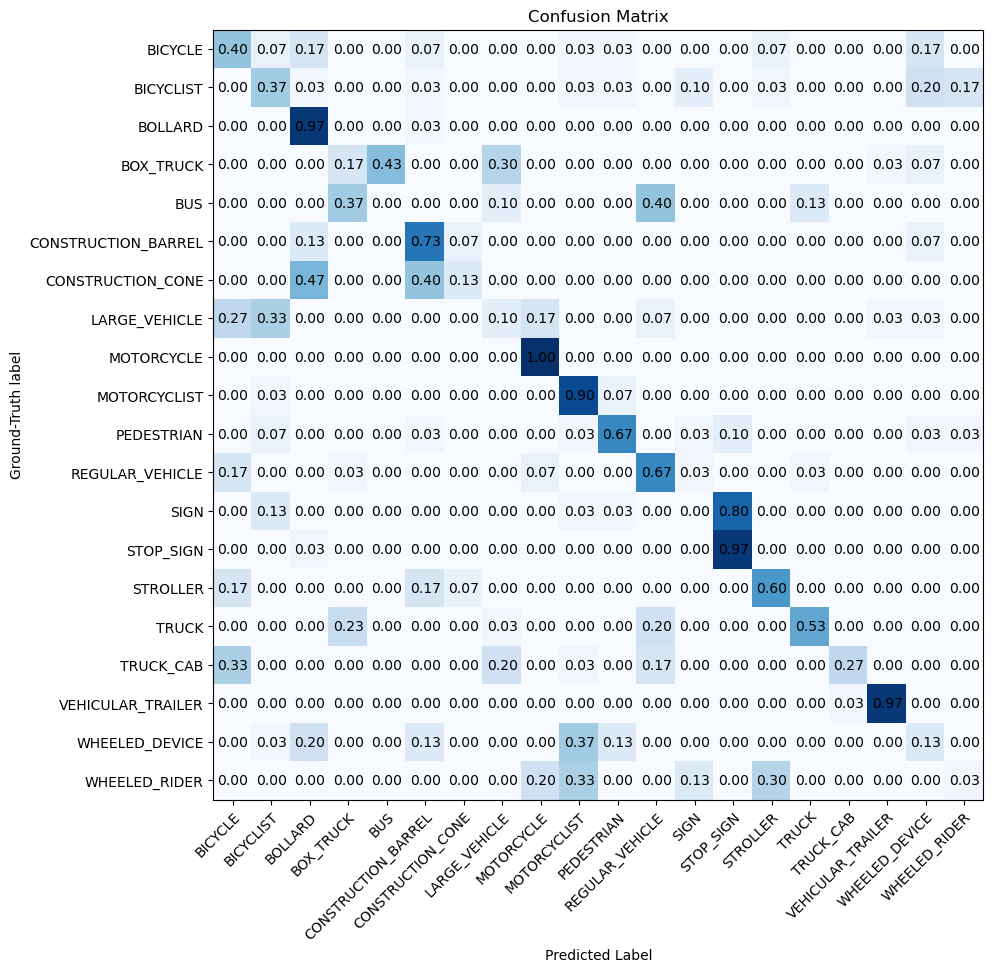

In [28]:
generate_and_plot_confusion_matrix(model, test_loader, 20)

Now lets visualize the critical points calculated by our model for the predestrian clouds from before. Recall that these are the points that contributed to the global feature. Why do you think these were the critical points the model ended up using? (Feel free to use different point clouds for your analysis)

In [30]:
plot_crit_points_from_file(model, 'data/sweeps/PEDESTRIAN/11.txt', 200)

ValueError: Expected more than 1 value per channel when training, got input size torch.Size([1, 1024])

## Part 5: Positional Encoding

Our basic PointNet model does pretty well. But let's see if we can do any better. One proposed solution to improve on the shortcomings of the basic PointNet model is using positional encoding (see pdf for more details). 

**TODO 5:** complete `part5_positional_encoding.py`

In [31]:
from vision.part5_positional_encoding import PointNetPosEncoding
from tests.test_part5 import (
    test_positional_encoding,
    test_pointnet_with_positional_encoding
)

In [32]:
print("test_positional_encoding(): ", verify(test_positional_encoding))
print("test_pointnet_with_positional_encoding(): ", verify(test_pointnet_with_positional_encoding))

test_positional_encoding():  "Correct"
test_pointnet_with_positional_encoding():  "Correct"


Lets check out how our model performs now that we added positional encoding.

To get full credit for this section, you will need *$\geq$ 65% accuracy* on the test dataset. The TAs were able to consistently achieve this accuracy with ~10 epochs of training.

*Hint: You may need to play around with the number of positional encoding dimensions to combat over-fitting of the training data*

In [34]:
lr = 1e-4
weight_decay = 1e-5
epochs = 20

model = PointNetPosEncoding(classes=20)
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

In [35]:
train_acc, train_loss, test_acc, test_loss = train(model, optimizer, epochs, train_loader, test_loader)

Epoch 1

Training...


100%|██████████| 213/213 [00:20<00:00, 10.47it/s]



Testing...


100%|██████████| 38/38 [00:02<00:00, 13.32it/s]



Epoch 1 Stats:
	Training accuracy: 0.4335
	Training loss: 1.8635
	Validation accuracy: 0.4150
	Validation loss: 1.8666

Validation accuracy improved from 0 to 0.41499999165534973
Saving model to PointNetPosEncoding.pt


Epoch 2

Training...


100%|██████████| 213/213 [00:20<00:00, 10.55it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 24.03it/s]



Epoch 2 Stats:
	Training accuracy: 0.6768
	Training loss: 1.1575
	Validation accuracy: 0.4717
	Validation loss: 1.7825

Validation accuracy improved from 0.41499999165534973 to 0.4716666638851166
Saving model to PointNetPosEncoding.pt


Epoch 3

Training...


100%|██████████| 213/213 [00:17<00:00, 12.00it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 26.02it/s]



Epoch 3 Stats:
	Training accuracy: 0.7847
	Training loss: 0.8368
	Validation accuracy: 0.4767
	Validation loss: 1.7459

Validation accuracy improved from 0.4716666638851166 to 0.476666659116745
Saving model to PointNetPosEncoding.pt


Epoch 4

Training...


100%|██████████| 213/213 [00:17<00:00, 11.89it/s]



Testing...


100%|██████████| 38/38 [00:02<00:00, 17.63it/s]



Epoch 4 Stats:
	Training accuracy: 0.8479
	Training loss: 0.6143
	Validation accuracy: 0.4933
	Validation loss: 1.7021

Validation accuracy improved from 0.476666659116745 to 0.4933333396911621
Saving model to PointNetPosEncoding.pt


Epoch 5

Training...


100%|██████████| 213/213 [00:20<00:00, 10.64it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 25.82it/s]



Epoch 5 Stats:
	Training accuracy: 0.9141
	Training loss: 0.4416
	Validation accuracy: 0.5117
	Validation loss: 1.6971

Validation accuracy improved from 0.4933333396911621 to 0.5116666555404663
Saving model to PointNetPosEncoding.pt


Epoch 6

Training...


100%|██████████| 213/213 [00:29<00:00,  7.15it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 21.75it/s]



Epoch 6 Stats:
	Training accuracy: 0.9476
	Training loss: 0.3049
	Validation accuracy: 0.4817
	Validation loss: 1.7940


Epoch 7

Training...


100%|██████████| 213/213 [00:20<00:00, 10.39it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 25.21it/s]



Epoch 7 Stats:
	Training accuracy: 0.9709
	Training loss: 0.2134
	Validation accuracy: 0.4633
	Validation loss: 1.9085


Epoch 8

Training...


100%|██████████| 213/213 [00:26<00:00,  8.11it/s]



Testing...


100%|██████████| 38/38 [00:02<00:00, 15.10it/s]



Epoch 8 Stats:
	Training accuracy: 0.9856
	Training loss: 0.1464
	Validation accuracy: 0.4550
	Validation loss: 1.9706


Epoch 9

Training...


100%|██████████| 213/213 [00:19<00:00, 11.02it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 20.30it/s]



Epoch 9 Stats:
	Training accuracy: 0.9921
	Training loss: 0.1088
	Validation accuracy: 0.4517
	Validation loss: 2.0747


Epoch 10

Training...


100%|██████████| 213/213 [00:27<00:00,  7.64it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 24.07it/s]



Epoch 10 Stats:
	Training accuracy: 0.9956
	Training loss: 0.0803
	Validation accuracy: 0.4783
	Validation loss: 2.0552


Epoch 11

Training...


100%|██████████| 213/213 [00:24<00:00,  8.71it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 22.03it/s]



Epoch 11 Stats:
	Training accuracy: 0.9968
	Training loss: 0.0663
	Validation accuracy: 0.4667
	Validation loss: 2.0794


Epoch 12

Training...


100%|██████████| 213/213 [00:24<00:00,  8.77it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 26.13it/s]



Epoch 12 Stats:
	Training accuracy: 0.9991
	Training loss: 0.0448
	Validation accuracy: 0.4750
	Validation loss: 2.0610


Epoch 13

Training...


100%|██████████| 213/213 [00:23<00:00,  9.03it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 23.16it/s]



Epoch 13 Stats:
	Training accuracy: 0.9974
	Training loss: 0.0439
	Validation accuracy: 0.4767
	Validation loss: 2.0860


Epoch 14

Training...


100%|██████████| 213/213 [00:22<00:00,  9.59it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 24.54it/s]



Epoch 14 Stats:
	Training accuracy: 0.9988
	Training loss: 0.0344
	Validation accuracy: 0.5000
	Validation loss: 2.0456


Epoch 15

Training...


100%|██████████| 213/213 [00:20<00:00, 10.47it/s]



Testing...


100%|██████████| 38/38 [00:02<00:00, 18.54it/s]



Epoch 15 Stats:
	Training accuracy: 0.9988
	Training loss: 0.0337
	Validation accuracy: 0.4433
	Validation loss: 2.1502


Epoch 16

Training...


100%|██████████| 213/213 [00:24<00:00,  8.62it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 23.10it/s]



Epoch 16 Stats:
	Training accuracy: 0.9991
	Training loss: 0.0269
	Validation accuracy: 0.4750
	Validation loss: 2.2343


Epoch 17

Training...


100%|██████████| 213/213 [00:18<00:00, 11.47it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 23.05it/s]



Epoch 17 Stats:
	Training accuracy: 0.9974
	Training loss: 0.0365
	Validation accuracy: 0.4883
	Validation loss: 2.0826


Epoch 18

Training...


100%|██████████| 213/213 [00:16<00:00, 12.62it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 23.07it/s]



Epoch 18 Stats:
	Training accuracy: 0.9962
	Training loss: 0.0420
	Validation accuracy: 0.4517
	Validation loss: 2.3216


Epoch 19

Training...


100%|██████████| 213/213 [00:19<00:00, 11.21it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 25.06it/s]



Epoch 19 Stats:
	Training accuracy: 0.9941
	Training loss: 0.0446
	Validation accuracy: 0.4467
	Validation loss: 2.5024


Epoch 20

Training...


100%|██████████| 213/213 [00:15<00:00, 13.42it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 26.66it/s]



Epoch 20 Stats:
	Training accuracy: 0.9959
	Training loss: 0.0412
	Validation accuracy: 0.4517
	Validation loss: 2.3082




In [36]:
model = torch.load('output/PointNetPosEncoding.pt')
test_acc, test_loss = test(model, test_loader)

100%|██████████| 38/38 [00:01<00:00, 21.78it/s]

Test accuracy: 0.5117
Test loss: 1.7073


Lets take a look at how the addition of positional encoding improved on the performance of our original PointNet model. Which classes does the positional encoding help the most with? Which ones does it not really seem to make much of a difference for? Why?

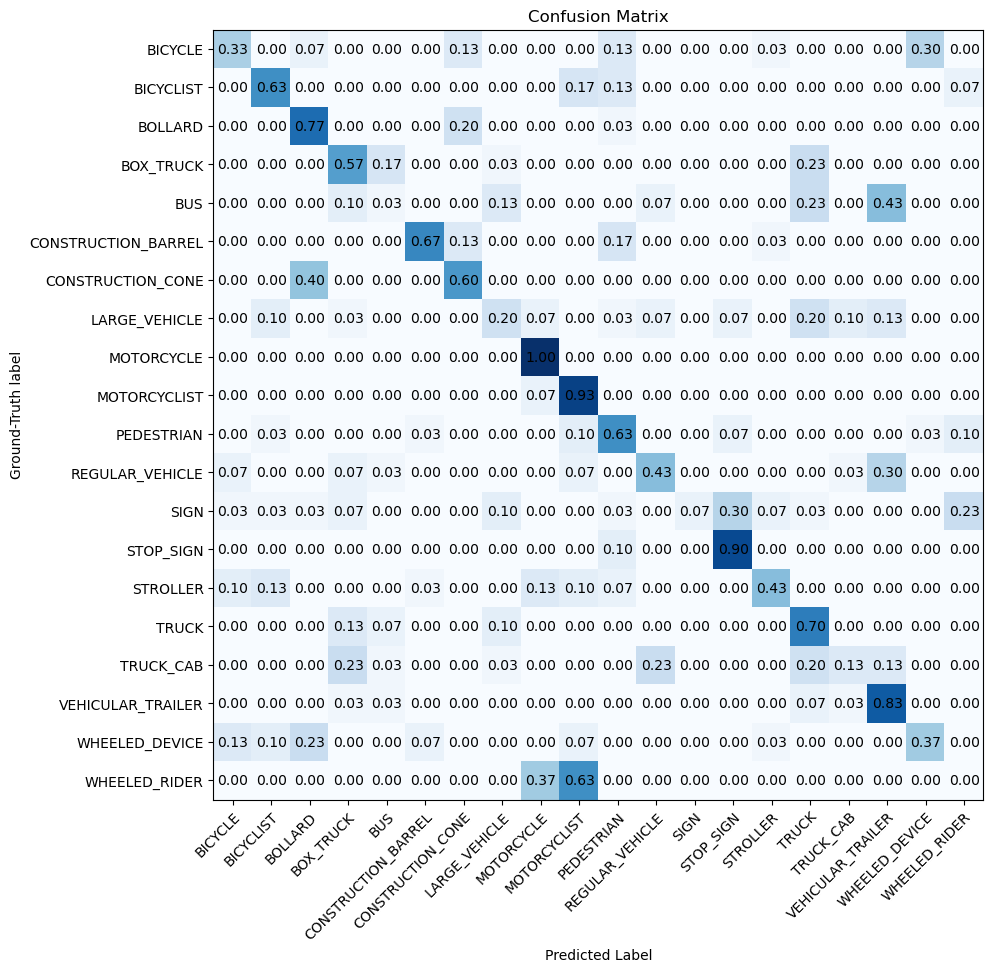

In [37]:
generate_and_plot_confusion_matrix(model, test_loader, 20)

In [38]:
plot_crit_points_from_file(model, 'data/sweeps/PEDESTRIAN/11.txt', 200)

ValueError: Expected more than 1 value per channel when training, got input size torch.Size([1, 1024])